# K-Nearest Neighbours

Another very simple algorithm is the K Nearest neighbours algorithm. This is a *supervised* classification/regression algorithm that has the following steps:

1. Choose a value for $k$ (we will see the difference due to this choice later!)
2. For a new point $x$, classify a point the same as the majority of its $k$ "nearest" (by some metric) neighbours. If there is a draw, there are a number of protocols for breaking a tie. One of which is decreasing $k$ by one until the tie is broken.

It's that simple - but there's a lot of room to play here - we can preprocess the data to change the coordinate system (e.g. a log-log scale), or change the metric by which the "closeness" is measured.

Let's take a look at a simple example:

In [ ]:
!wget "https://raw.githubusercontent.com/stmball/PracticalPython/main/Classification%20Models/test_data.csv"

--2021-06-01 09:53:40--  https://raw.githubusercontent.com/stmball/PracticalPython/main/Week_3/test_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5387 (5.3K) [text/plain]
Saving to: ‘test_data.csv’

test_data.csv       100%[===================>]   5.26K  --.-KB/s    in 0s      

2021-06-01 09:53:40 (50.1 MB/s) - ‘test_data.csv’ saved [5387/5387]



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Import some dummy data I've generated ahead of time.
df = pd.read_csv("test_data.csv")

print(df.head())


   class     x data     y data
0      0  27.095400  28.338278
1      0  36.357474  26.011727
2      0  21.115430   1.768997
3      0  11.524589  16.216907
4      0  31.990294  21.280534


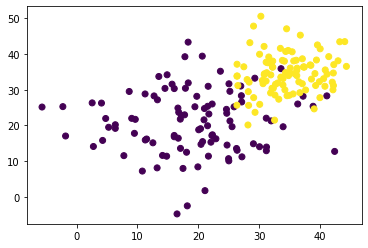

In [ ]:
fig, ax = plt.subplots()

ax.scatter(df['x data'], df['y data'], c=df['class'])
plt.show()

This is a great time to look at model validation. Since our model will only run once, let's start with a simple train/test split of 80/20. That means that we randomly take 80% of our data and use it for training, but keep 20% behind for measuring metrics. These metrics are comparative - so we will keep using this data for other classification models and see which method is best!

In [ ]:
# Here I am seperating the actual x, y data and the classes into two seperate
# objects. This is more to do with the scikitlearn method of doing things than
# anything!

data = df.drop('class', axis=1).values
classes = df['class'].values

from sklearn.model_selection import train_test_split

# Unpack the train test splitted data. Test size = 0.2 = 20% of data is testing.
x_train, x_test, y_train, y_test = train_test_split(data, classes, test_size=0.2)


# Here we choose k=5. Investigation into different k in a moment!
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# We now have our model - but let's predict our testing set and get 
# a metric!

y_predict = knn.predict(x_test)

# We won't always have the luxury of printing this, but let's try
print('Test values', y_test)
print('Predicted values', y_predict)

# We can see some differences. Let's get the F1 score.
from sklearn.metrics import f1_score
print('F1 Score:', f1_score(y_test, y_predict))

Test values [0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 1 1 1 1 0 0 1 0 1
 0 0 0]
Predicted values [0 0 1 0 0 1 0 0 1 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 1 1 1 1 0 0 0 0 1
 0 0 0]
F1 Score: 0.875


For 2D data it can be very helpful to see the "map" of our classification. This is a bit hard to do but *very very* helpful - so let's do it anyway.

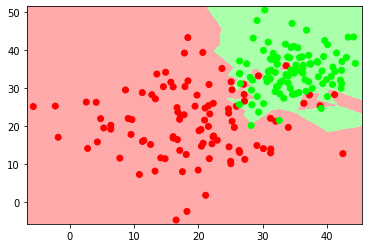

In [ ]:
# Setting up requires a minimum and maximum bound - 
# it makes sense to use the min and max values of our data for this:

x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1

# h is the step size of the mesh - lower h means higher resolution.

h= 0.1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

#Ravel will take the 2 dimensional xx and yy arrays and "unravel" them into a 1d array.
#c_ then pairs off these points to give a 1 dimensional array with x and y points for every point in the meshgrid.
#We then predict every point and call this Z, then reshape it so it's the same shape as xx and yy

Z = knn.predict(np.c_[xx.ravel(),yy.ravel()]) 
Z = Z.reshape(xx.shape)

#We then define our own colormaps, and plot our data using a colormesh and a scatter plot.

from matplotlib.colors import ListedColormap

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

# Now plot

fig, ax = plt.subplots()

ax.pcolormesh(xx, yy, Z, cmap=cmap_light)
ax.scatter(data[:, 0], data[:, 1], c=classes, cmap = cmap_bold)
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

plt.show()

So we can instantly see the "border" of our clustering algorithm. This will be very useful to see with our other models as well!

Now let's put this all together to look at how different values of $k$ effect our boundary. This is going to take a long time because we are predicting a ton of points for the background!

F1 Score for k =  1 0.875


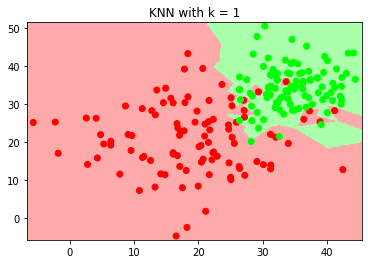

F1 Score for k =  3 0.9032258064516129


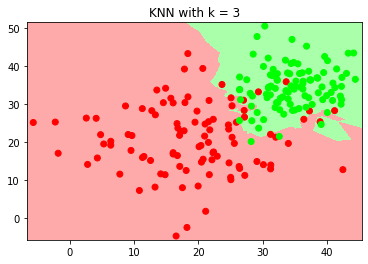

F1 Score for k =  5 0.8823529411764706


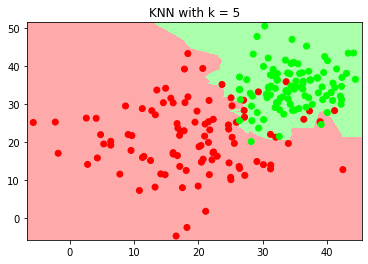

F1 Score for k =  10 0.8823529411764706


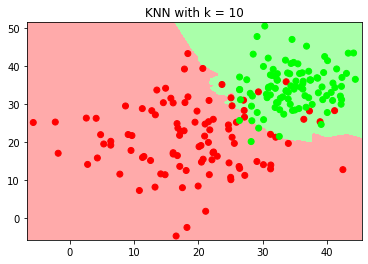

F1 Score for k =  25 0.823529411764706


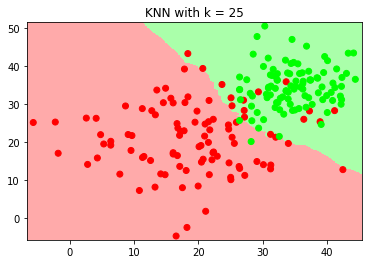

In [ ]:
for k in [1,3,5,10,25]:

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)

    # Predict
    y_predict = knn.predict(x_test)
    print('F1 Score for k = ', k, f1_score(y_test, y_predict))

    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    
    h=0.1 #h is the step size of the mesh - lower h means higher resolution.
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    #Ravel will take the 2 dimensional xx and yy arrays and "unravel" them into a 1d array.
    #c_ then pairs off these points to give a 1 dimensional array with x and y points for every point in the meshgrid.
    #We then predict every point and call this Z, then reshape it so it's the same shape as xx and yy
    
    Z = knn.predict(np.c_[xx.ravel(),yy.ravel()]) 
    Z = Z.reshape(xx.shape)
    
    #We then define our own colormaps (you can skip this step if you want), and plot our data using a colormesh and a scatter plot.
    
    from matplotlib.colors import ListedColormap
    
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00'])
    
    fig, ax = plt.subplots()
    ax.pcolormesh(xx, yy, Z, cmap=cmap_light)
    ax.scatter(data[:, 0], data[:, 1], c=classes, cmap = cmap_bold)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title("KNN with k = " + str(k))
    plt.show()

# Support Vector Machines

Support Vector Machines are another classification model that aims to create a "decision boundary" that maximises the distance between itself and the two set of points. This method is deceptively simple - the first example will be extremely intuitive but the second will use a common technique that is not easy to understand!

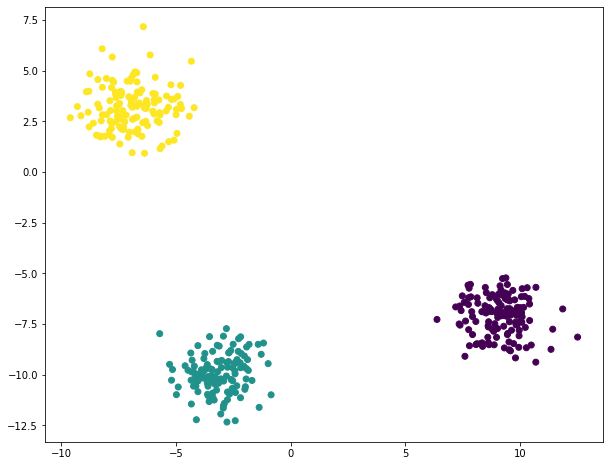

In [ ]:
from sklearn.datasets import make_blobs

data = make_blobs(n_samples=400, centers=3)
points = data[0]
labels = data[1]


fig, ax = plt.subplots(figsize=(10, 8))

# We need to index all the x points and all the y points respectively to get them
# plotted. Luckily we know how to do this using numpy indexing!

# (Take every row's 1st item)
x = points[:, 0]

# (Take every row's 2nd item)
y = points[:, 1]

ax.scatter(x, y, c=labels)

plt.show()

Run the above until you get 3 seperable clusters - we have the classification for all of them in the labels parameter.

In [ ]:
from sklearn import svm
from sklearn.metrics import f1_score


# Train test split
x_train, x_test, y_train, y_test = train_test_split(points, labels, test_size=0.2)

# Build and fit model
model = svm.LinearSVC()
model.fit(x_train, y_train)


y_predict = model.predict(x_test)

# We won't always have the luxury of printing this, but let's try
print('Test values', y_test)
print('Predicted values', y_predict)

# We can see some differences. Let's get the F1 score.
print('F1 Score:', f1_score(y_test, y_predict, average="macro"))

Test values [0 2 2 0 0 1 2 1 0 0 2 1 2 1 0 1 1 0 2 2 2 2 2 1 2 0 1 2 0 0 1 1 0 0 2 1 1
 1 2 2 1 2 2 1 0 0 1 1 2 1 1 1 0 1 0 0 0 1 1 0 0 2 0 1 1 0 1 0 2 0 2 0 2 2
 1 2 1 1 0 1]
Predicted values [0 2 2 0 0 1 2 1 0 0 2 1 2 1 0 1 1 0 2 2 2 2 2 1 2 0 1 2 0 0 1 1 0 0 2 1 1
 1 2 2 1 2 2 1 0 0 1 1 2 1 1 1 0 1 0 0 0 1 1 0 0 2 0 1 1 0 1 0 2 0 2 0 2 2
 1 2 1 1 0 1]
F1 Score: 1.0


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


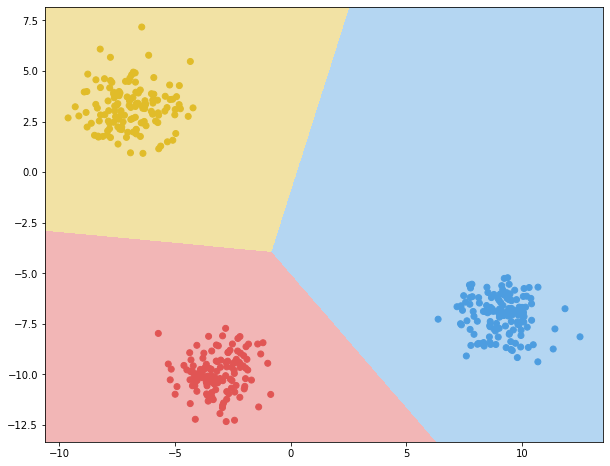

In [ ]:
# Setting up requires a minimum and maximum bound - 
# it makes sense to use the min and max values of our data for this:

x_min, x_max = points[:, 0].min() - 1, points[:, 0].max() + 1
y_min, y_max = points[:, 1].min() - 1, points[:, 1].max() + 1

# h is the step size of the mesh - lower h means higher resolution.

h= 0.01

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

#Ravel will take the 2 dimensional xx and yy arrays and "unravel" them into a 1d array.
#c_ then pairs off these points to give a 1 dimensional array with x and y points for every point in the meshgrid.
#We then predict every point and call this Z, then reshape it so it's the same shape as xx and yy

Z = model.predict(np.c_[xx.ravel(),yy.ravel()]) 
Z = Z.reshape(xx.shape)

#We then define our own colormaps, and plot our data using a colormesh and a scatter plot.

from matplotlib.colors import ListedColormap

cmap_bold = ListedColormap(['#4D9DE0', '#E15554', '#E1BC29'])
cmap_light = ListedColormap(['#B4D6F2', '#F2B6B6', '#F2E2A4'])

# Now plot

fig, ax = plt.subplots(figsize=(10, 8))

ax.pcolormesh(xx, yy, Z, cmap=cmap_light)
ax.scatter(points[:, 0], points[:, 1], c=labels, cmap = cmap_bold)
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

plt.show()

Great - we now have a very simple model that linearly seperates our data into sections. These lines which seperate our data are called the decision boundary, and are nice and clean and well defined (unlike kNN!). This can be helpful for interpretability and reducing overfitting.

But what happens if we have data like the following?

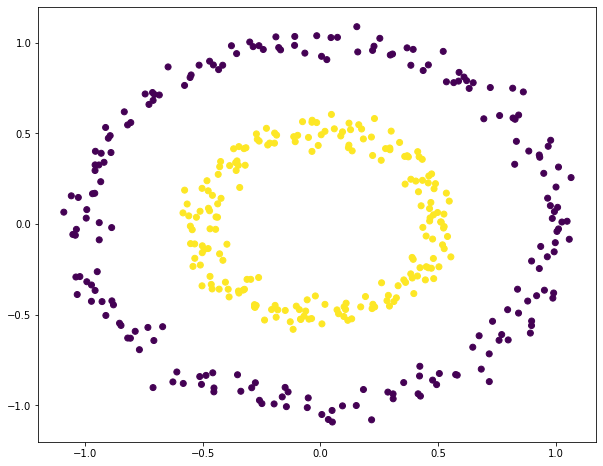

In [ ]:
from sklearn.datasets import make_circles

data = make_circles(n_samples=400, factor=0.5, noise=0.05)
points = data[0]
labels = data[1]


fig, ax = plt.subplots(figsize=(10, 8))

# We need to index all the x points and all the y points respectively to get them
# plotted. Luckily we know how to do this using numpy indexing!

# (Take every row's 1st item)
x = points[:, 0]

# (Take every row's 2nd item)
y = points[:, 1]

ax.scatter(x, y, c=labels)

plt.show()

No line is going to be able to seperate these two classes - kNN can deal with this easily but the line is going to be jagged and not clear. There has to be a better way!

Enter - the kernel trick. The kernel trick has some VERY complicated mathematics behind it, but essentially there are a group of mathematical functions called "kernels" that can map our data into higher dimensional space that can then be seperated easily using a plane. After the classification, the data can then be projected down to the original feature space to get a classification.

![image](https://i.stack.imgur.com/qonyo.png)

`sklearn` has a number of built in kernels to use, with different applications - and in theory you could build your own. Let's see how a polynomial kernel (as in the above data) easily classifies this data. Without the trick, this would be impossible!

In [ ]:
from sklearn import svm
from sklearn.metrics import f1_score


# Train test split
x_train, x_test, y_train, y_test = train_test_split(points, labels, test_size=0.2)

# Build and fit model
model = svm.SVC(kernel='poly', degree=2, gamma='auto')
model.fit(x_train, y_train)


y_predict = model.predict(x_test)

# We won't always have the luxury of printing this, but let's try
print('Test values', y_test)
print('Predicted values', y_predict)

# We can see some differences. Let's get the F1 score.
print('F1 Score:', f1_score(y_test, y_predict, average="macro"))

Test values [1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0
 0 0 1 1 1 1 0 1 1 1 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0 1 0 1 0 1
 0 1 0 1 0 0]
Predicted values [1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0
 0 0 1 1 1 1 0 1 1 1 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0 1 0 1 0 1
 0 1 0 1 0 0]
F1 Score: 1.0


Good metric - let's see what's up!

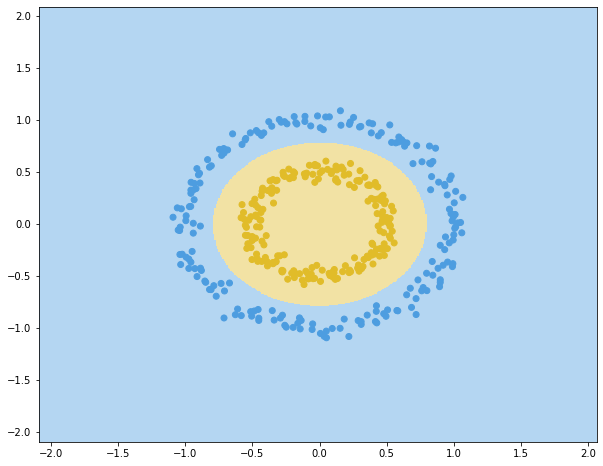

In [ ]:
# Setting up requires a minimum and maximum bound - 
# it makes sense to use the min and max values of our data for this:

x_min, x_max = points[:, 0].min() - 1, points[:, 0].max() + 1
y_min, y_max = points[:, 1].min() - 1, points[:, 1].max() + 1

# h is the step size of the mesh - lower h means higher resolution.

h= 0.01

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

#Ravel will take the 2 dimensional xx and yy arrays and "unravel" them into a 1d array.
#c_ then pairs off these points to give a 1 dimensional array with x and y points for every point in the meshgrid.
#We then predict every point and call this Z, then reshape it so it's the same shape as xx and yy

Z = model.predict(np.c_[xx.ravel(),yy.ravel()]) 
Z = Z.reshape(xx.shape)

#We then define our own colormaps, and plot our data using a colormesh and a scatter plot.

from matplotlib.colors import ListedColormap

cmap_bold = ListedColormap(['#4D9DE0', '#E15554', '#E1BC29'])
cmap_light = ListedColormap(['#B4D6F2', '#F2B6B6', '#F2E2A4'])

# Now plot

fig, ax = plt.subplots(figsize=(10, 8))

ax.pcolormesh(xx, yy, Z, cmap=cmap_light)
ax.scatter(points[:, 0], points[:, 1], c=labels, cmap = cmap_bold)
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

plt.show()

Woo! It's fab! Tricks like this are really common - often a clever preprocessing transformation can completely change how well our model fits!

# Activity 2.1

In the `project_training` dataset, we have some 3 dimensional data. 

* Perform a train, test split and test a k nearest neighbours model for 4 different values of $k$, recording metrics for each one. Which value of $k$ gave the best metrics? Did this correlate with the best model? Why?

* Use a Support Vector Machine to build a classifier for the same data and compare performance with the kNN model. Which is better?

In [ ]:
!wget "https://raw.githubusercontent.com/stmball/PracticalPython/main/Classification%20Models/project_training.csv"

# Activity 2.2

[Decision Trees](https://scikit-learn.org/stable/modules/tree.html) are another classifier that work slightly differently to the ther models above. First, using the `make_blobs` function, build a decision tree and see the shape of the decision boundary - also try plotting the tree itself (how to do this is in the link above!). Then, use this model on the 3D data above and compare performance with the other models. 

# Activity 2.3

The `iris` dataset is back again (it's very helpful!) - perform the same task as in 2.1 and compare this model with our k-means clustering model. Which model is more accurate? Which is most intepretable? 

# Activity 2.4 (Tough!)

Here's a far more independent task, a big "step up" from previous tasks as you will have to do some searching for answers on how best complete it. The Wisconsin Breast Cancer dataset is another benchmark dataset for machine learning tasks. Find and download the datasets from this repository: http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29 (you will need the wdbc files and not the wpbc files) and train and test a classification model(s) for this data. (You will need to look up how to parse and preprocess some of the data!). Record your metric for your best model.

Now answer the following questions:

* Can you think of a few ways of how this model might not be appropriate, or poorly implemented in practice? For example, how would two patients, one with a tumour "on the border" of being malignant, and one with a tumour "safely" benign be classified by our model? Is this correct? Can you think of any adjustments to the algorithm or model that might help remedy this?
* Try to explain the real-life impact of differing hyperparameters - for example, differing values of $k$ for kNN, or different kernels for SVM.

